# 株価データ 取得 & 可視化 基礎
株価のデータを yfinance(日経225)やstooq(個別銘柄)を取得し、単純移動平均(SMA: Simple Moving Average)や、出来高(その日の取引量)を可視化する

## 単純移動平均(SMA: Simple Moving Average)とは
一定期間の平均価格を日々計算して線で繋いだもの。  
基本的には終値の平均を計算する。  
日中の大きな変動に惑わされることなく、現在の相場のトレンド（方向性）を見抜く際に役立つ

### 長期間と短期間のSMAの交差から、ゴールデンクロス、デッドクロスを見極める
![ゴールデンクロス](images/golden_cross.png)

長期的なスパンで単純移動平均線を計算すると、割る数が大きくなるため、緩やかになる  
長期的な勢いを緑の長期移動平均線、短期的な勢いを青の短期移動平均線で表している。  
つまり、  
- ゴールデンクロスでは短期的な勢いが長期的な勢いに比べて強い　＝＞　これから上がっていく雰囲気がある　＝＞　買いシグナル
- デッドクロスでは短期的な勢いが長期的な勢いに比べて弱い　＝＞　これから下がっていく雰囲気がある　＝＞　売りシグナル

In [1]:
from pandas_datareader import data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
start = "2019-06-01"
end = "2020-06-01"

# 一度 yfinaceライブラリから、pandas datareader を使得るように、以下のように pdr_override メソッドを実行する必要がある
# yf.pdr_override()
# df = data.get_data_yahoo('^N225', start, end)
df = yf.download('^N225', start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,20327.869141,20438.029297,20305.740234,20410.880859,20410.880859,67400000
2019-06-04,20435.859375,20464.570312,20289.640625,20408.539062,20408.539062,69200000
2019-06-05,20667.890625,20800.640625,20646.150391,20776.099609,20776.099609,72300000
2019-06-06,20745.839844,20842.279297,20745.839844,20774.039062,20774.039062,59600000
2019-06-07,20859.779297,20907.769531,20816.580078,20884.710938,20884.710938,50700000


- High => その日の高値
- Low => その日の安値
- Open => その日の始値
- End => その日の終値
- Volume => その日の出来高。つまり、**株取引された量のこと。** 
- Adj Close => 調整後の終値

### 調整後の終値のグラフを表示する

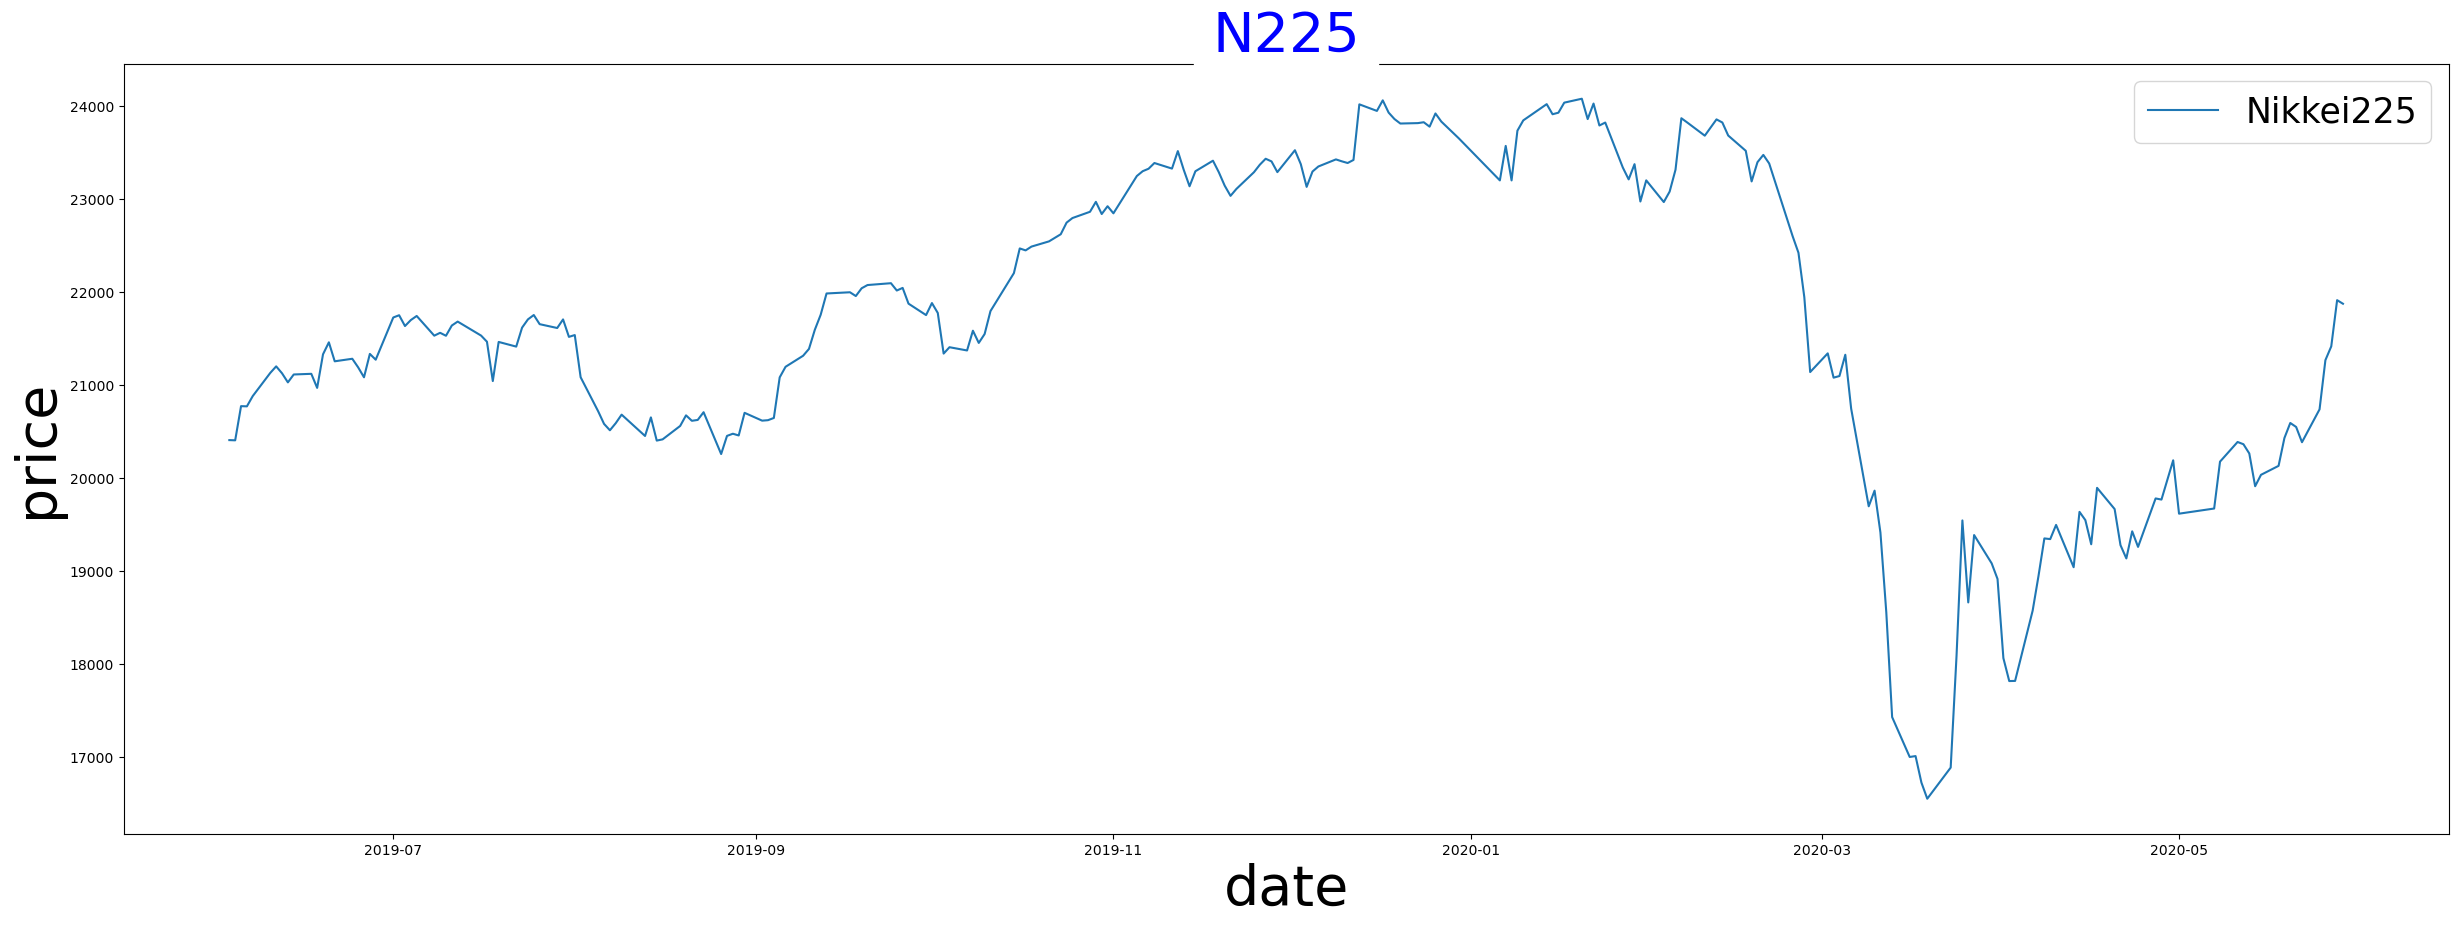

In [4]:
date = df.index
price = df["Adj Close"]
plt.figure(figsize=(30, 10))
plt.plot(date, price, label="Nikkei225")
plt.title("N225", color="blue", backgroundcolor="white", size=40, loc="center")
plt.xlabel("date", color="black", size=40)
plt.ylabel("price", color="black", size=40)
plt.legend(fontsize=25)

## 単純移動平均(SMA: Simple Moving Average)を計算する

In [5]:
span01=5
span02=25
span03=50

df["sma01"] = price.rolling(window=span01).mean()
df["sma02"] = price.rolling(window=span02).mean()
df["sma03"] = price.rolling(window=span03).mean()
df.head(100)

,Open,High,Low,Close,Adj Close,Volume,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20327.869141,20438.029297,20305.740234,20410.880859,20410.880859,67400000,NaN,NaN,NaN
2019-06-04,20435.859375,20464.570312,20289.640625,20408.539062,20408.539062,69200000,NaN,NaN,NaN
2019-06-05,20667.890625,20800.640625,20646.150391,20776.099609,20776.099609,72300000,NaN,NaN,NaN
2019-06-06,20745.839844,20842.279297,20745.839844,20774.039062,20774.039062,59600000,NaN,NaN,NaN
2019-06-07,20859.779297,20907.769531,20816.580078,20884.710938,20884.710938,50700000,20650.853906,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-10-21,22541.220703,22581.279297,22515.730469,22548.900391,22548.900391,48400000,22434.714062,21919.802344,21315.456172
2019-10-23,22619.769531,22648.810547,22457.890625,22625.380859,22625.380859,68000000,22518.348047,21954.433203,21357.632578
2019-10-24,22725.439453,22780.990234,22704.330078,22750.599609,22750.599609,61300000,22573.883984,21984.925625,21400.777578


指定したspanさかのぼれない場合はSMAの値が`NaN`となっていることがわかる。  
e.g. 過去5日の平均値を取得する `sma01` カラムでは最初の4行の値が`NaN`になっている。

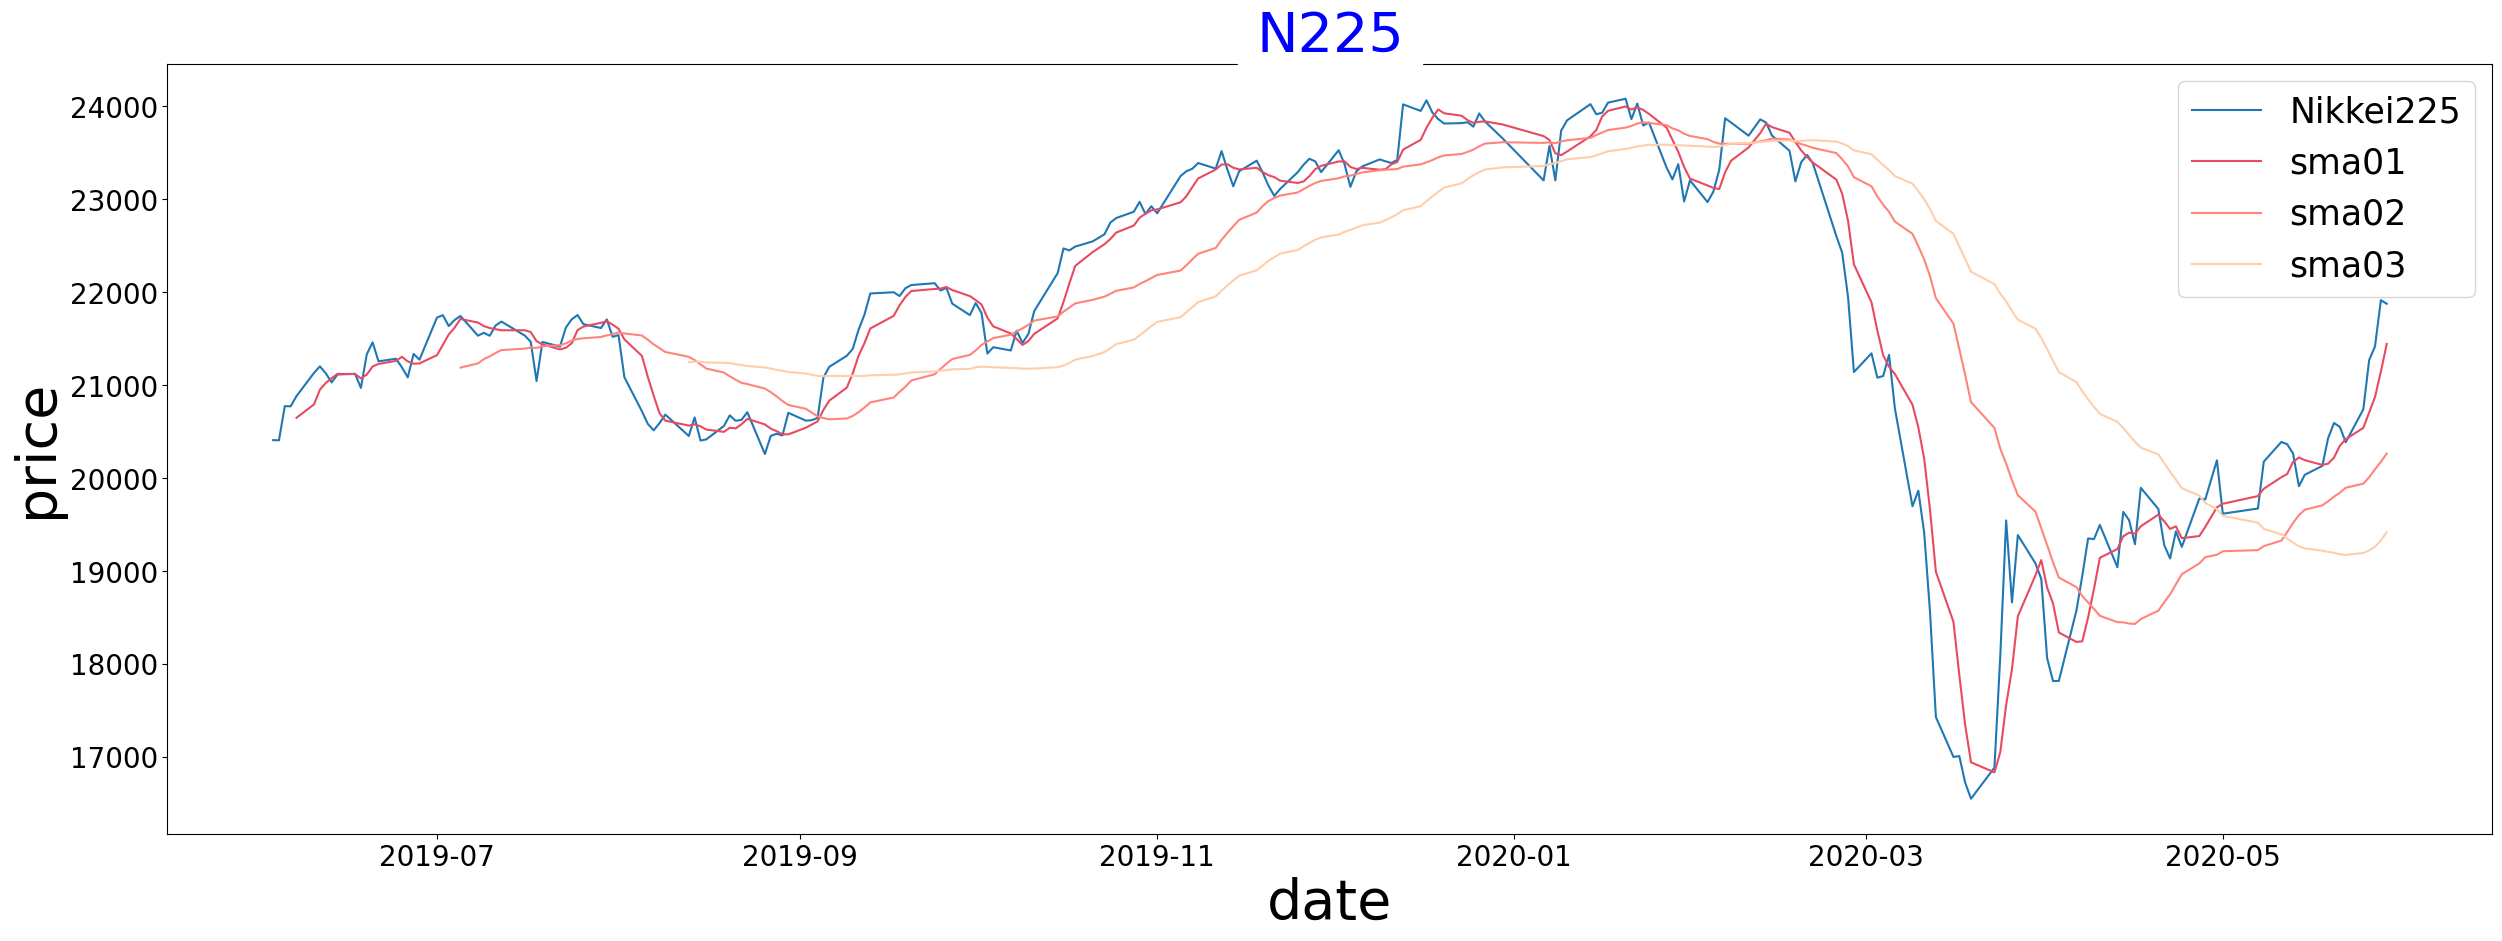

In [6]:
plt.figure(figsize=(30, 10))
plt.plot(date, price, label="Nikkei225")
# それぞれのSMAの描画
plt.plot(date, df["sma01"], label="sma01", color="#e84a5f")
plt.plot(date, df["sma02"], label="sma02", color="#ff847c")
plt.plot(date, df["sma03"], label="sma03", color="#feceab")

plt.title("N225", color="blue", backgroundcolor="white", size=40, loc="center")
plt.xlabel("date", color="black", size=40)
plt.ylabel("price", color="black", size=40)
# tickのサイズを変更する
plt.tick_params(axis="both", which="major", labelsize=20)
plt.legend(fontsize=25)

### ゴールデンクロスに基づいて考察する
![ゴールデンクロス](images/golden_cross.png)

長期的なスパンで単純移動平均線を計算すると、割る数が大きくなるため、緩やかになる  
長期的な勢いを緑の長期移動平均線、短期的な勢いを青の短期移動平均線で表している。  
つまり、  
- ゴールデンクロスでは短期的な勢いが長期的な勢いに比べて強い　＝＞　これから上がっていく雰囲気がある　＝＞　買いシグナル
- デッドクラスでは短期的な勢いが長期的な勢いに比べて弱い　＝＞　これから下がっていく雰囲気がある　＝＞　売りシグナル

## 出来高(株取引された量)を棒グラフで描画する

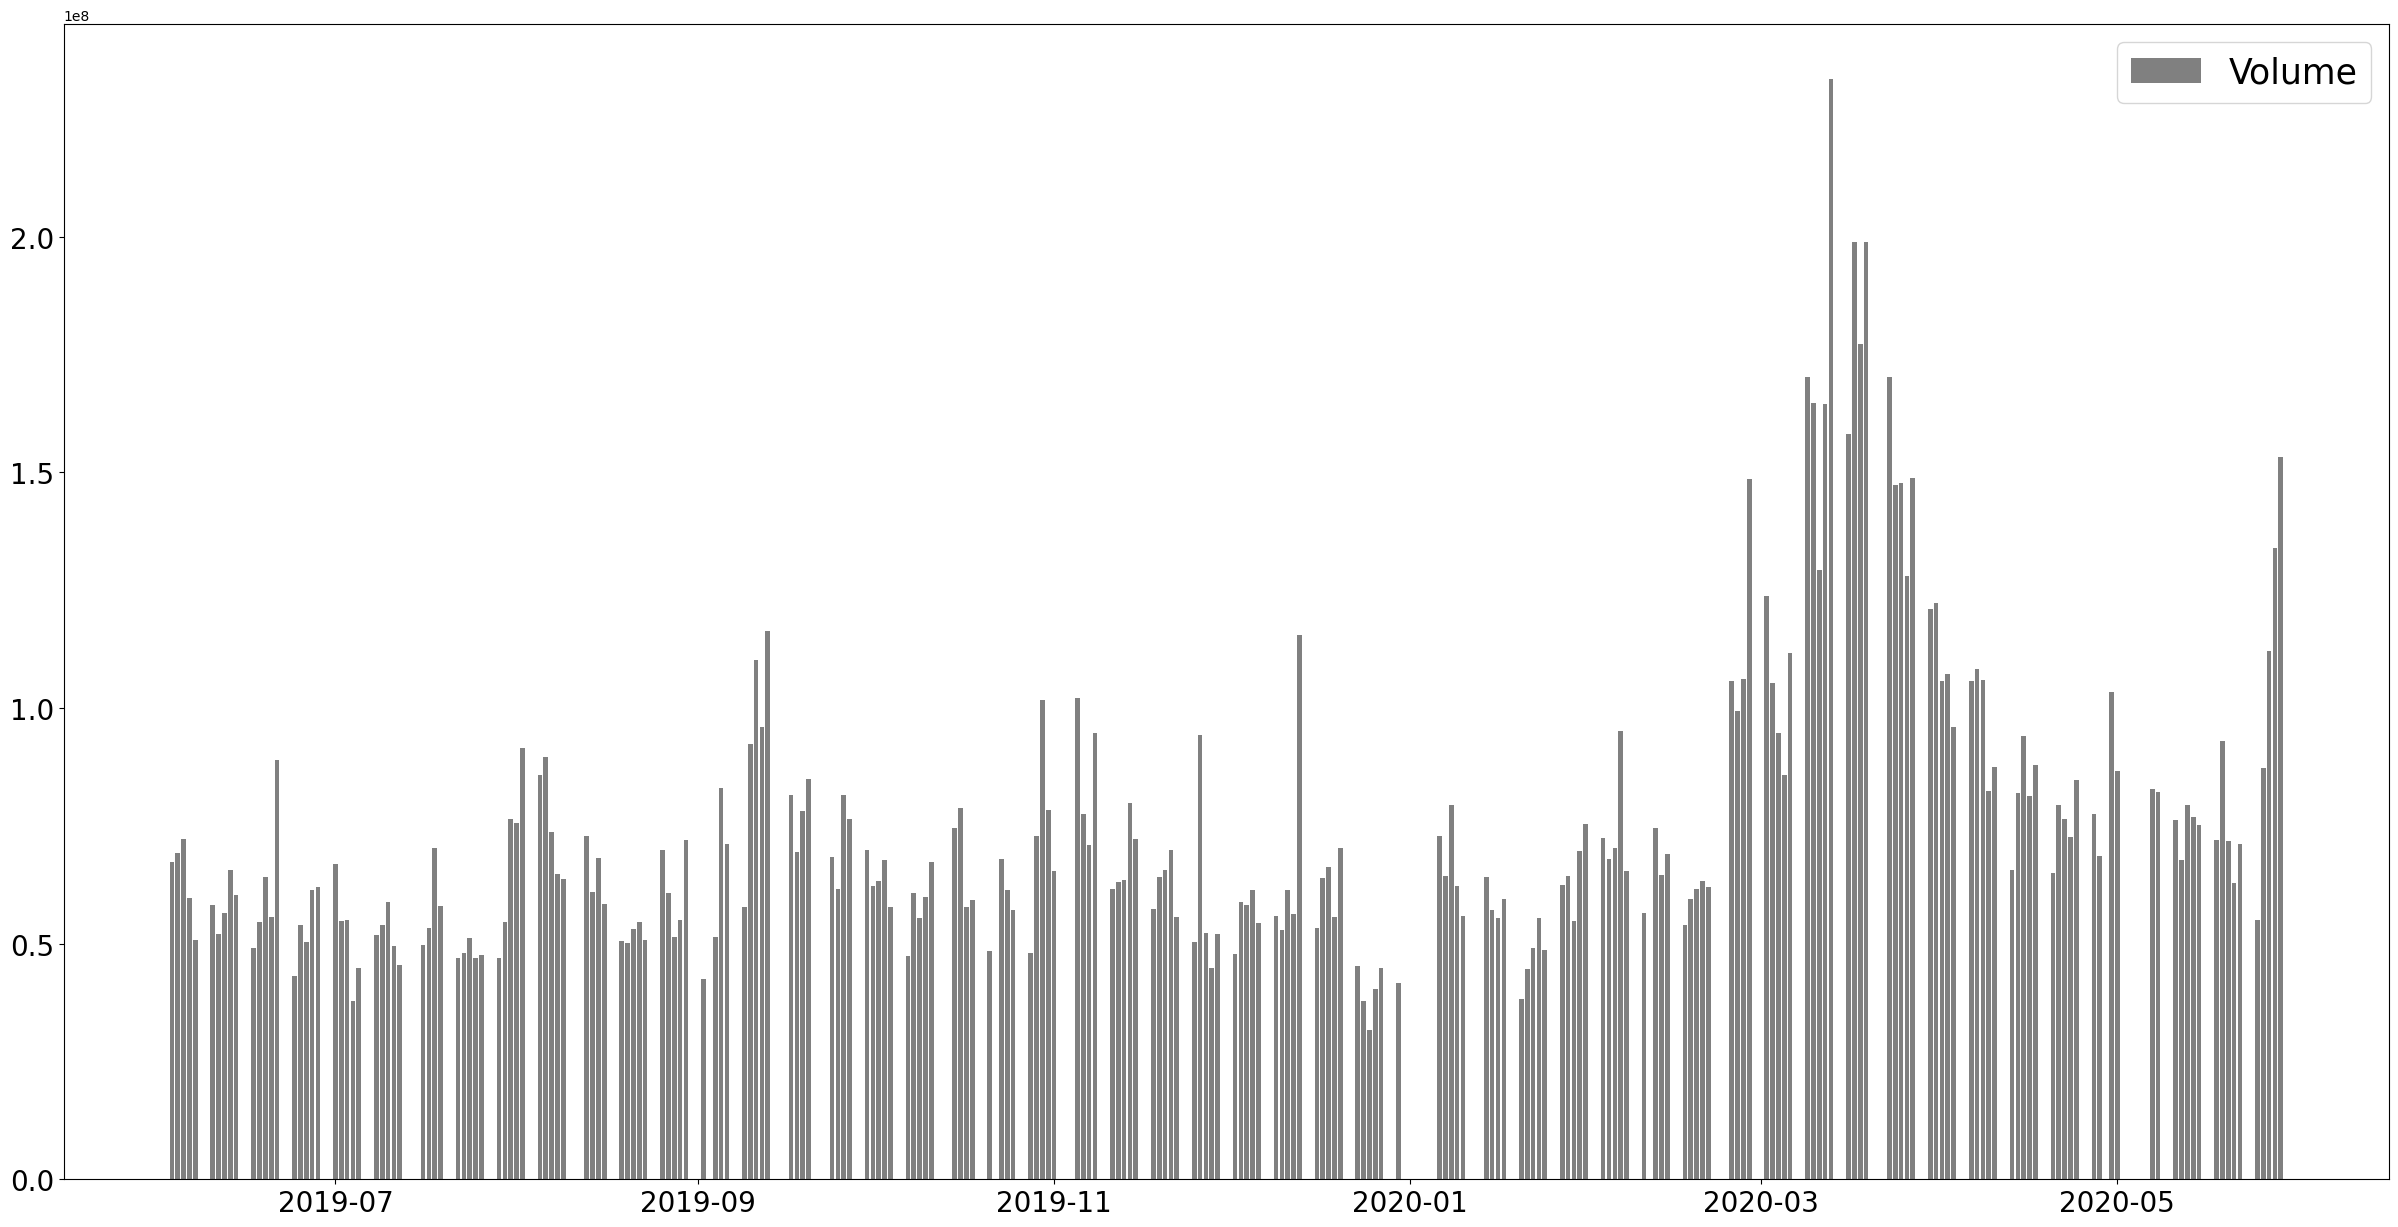

In [7]:
plt.figure(figsize=(30, 15))
plt.bar(date, df["Volume"], label="Volume", color="gray")
# tickのサイズを変更する
plt.tick_params(axis="both", which="major", labelsize=20)
plt.legend(fontsize=25)

### 移動平均のグラフと出来高の棒グラフを合わせて表示する

Text(0.5, 0.98, 'N225')

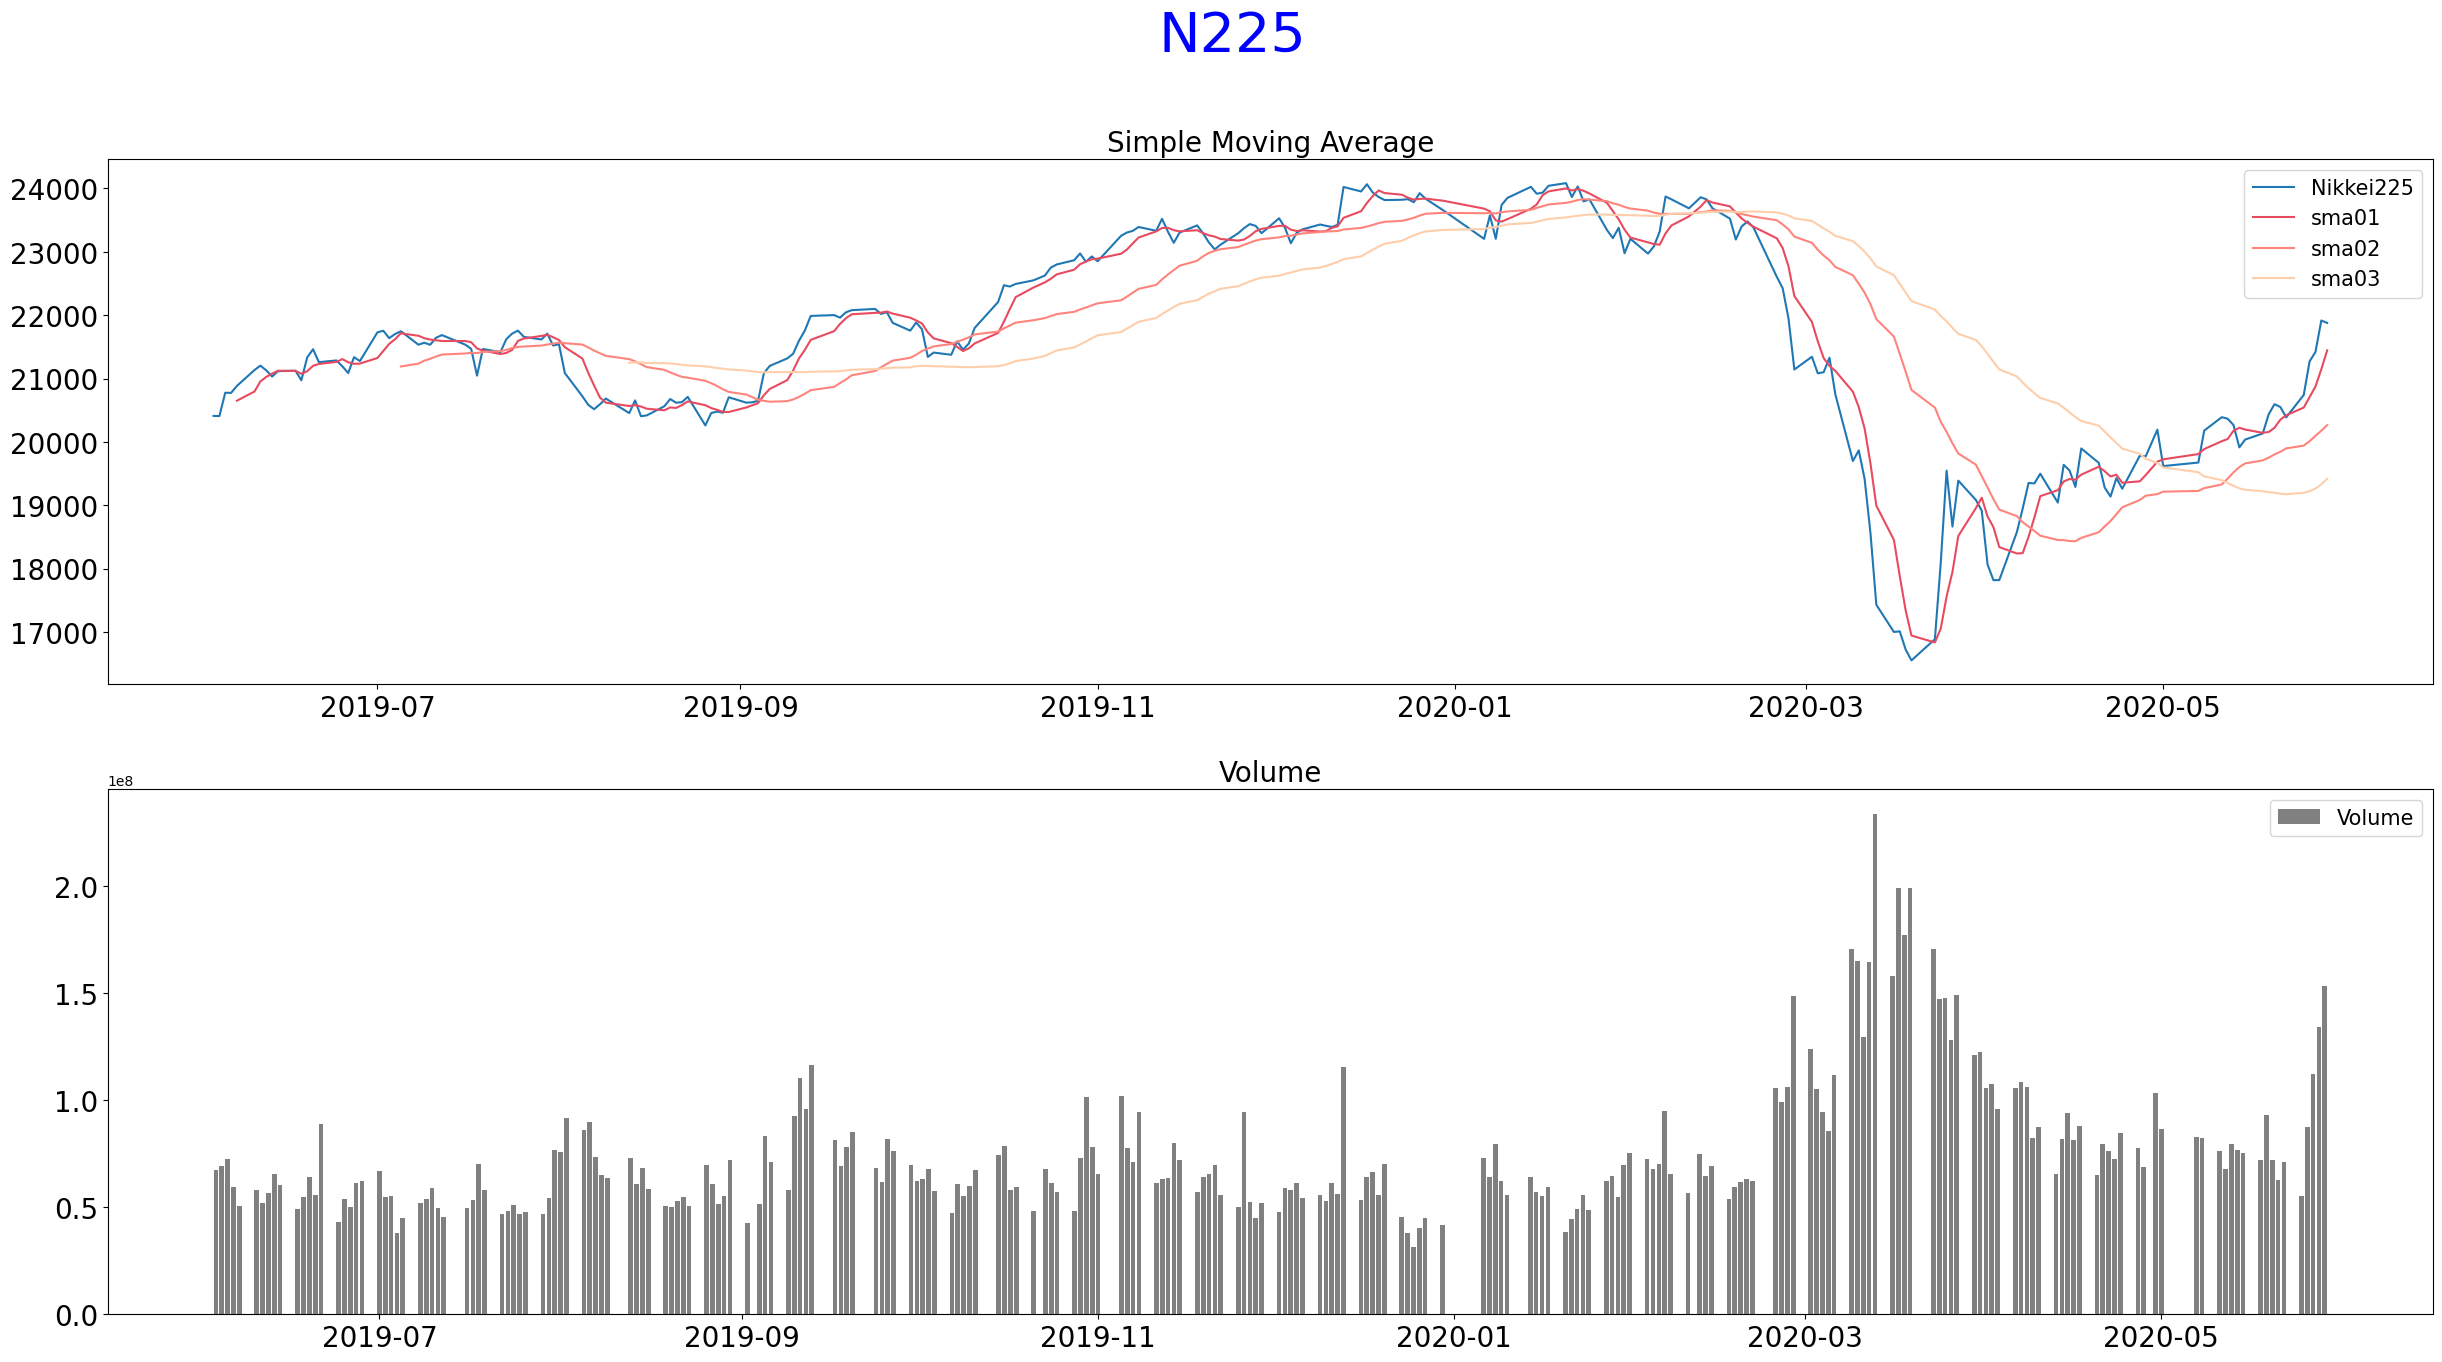

In [8]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(30, 15))
ax1.plot(date, price, label="Nikkei225")
# それぞれのSMAの描画
ax1.plot(date, df["sma01"], label="sma01", color="#e84a5f")
ax1.plot(date, df["sma02"], label="sma02", color="#ff847c")
ax1.plot(date, df["sma03"], label="sma03", color="#feceab")
ax1.set_title("Simple Moving Average", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=20)
ax1.legend(fontsize=15)

ax2.bar(date, df["Volume"], label="Volume", color="gray")
# tickのサイズを変更する
ax2.set_title("Volume", fontsize=20)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax2.legend(fontsize=15)

# 全体のタイトルの指定
fig.suptitle('N225', fontsize=40, color="blue")

## 個別銘柄のデータを取得し、同様に可視化する(例としてリクルートのデータを取得)
株価の情報は [Stooq](https://stooq.com/) から得る。

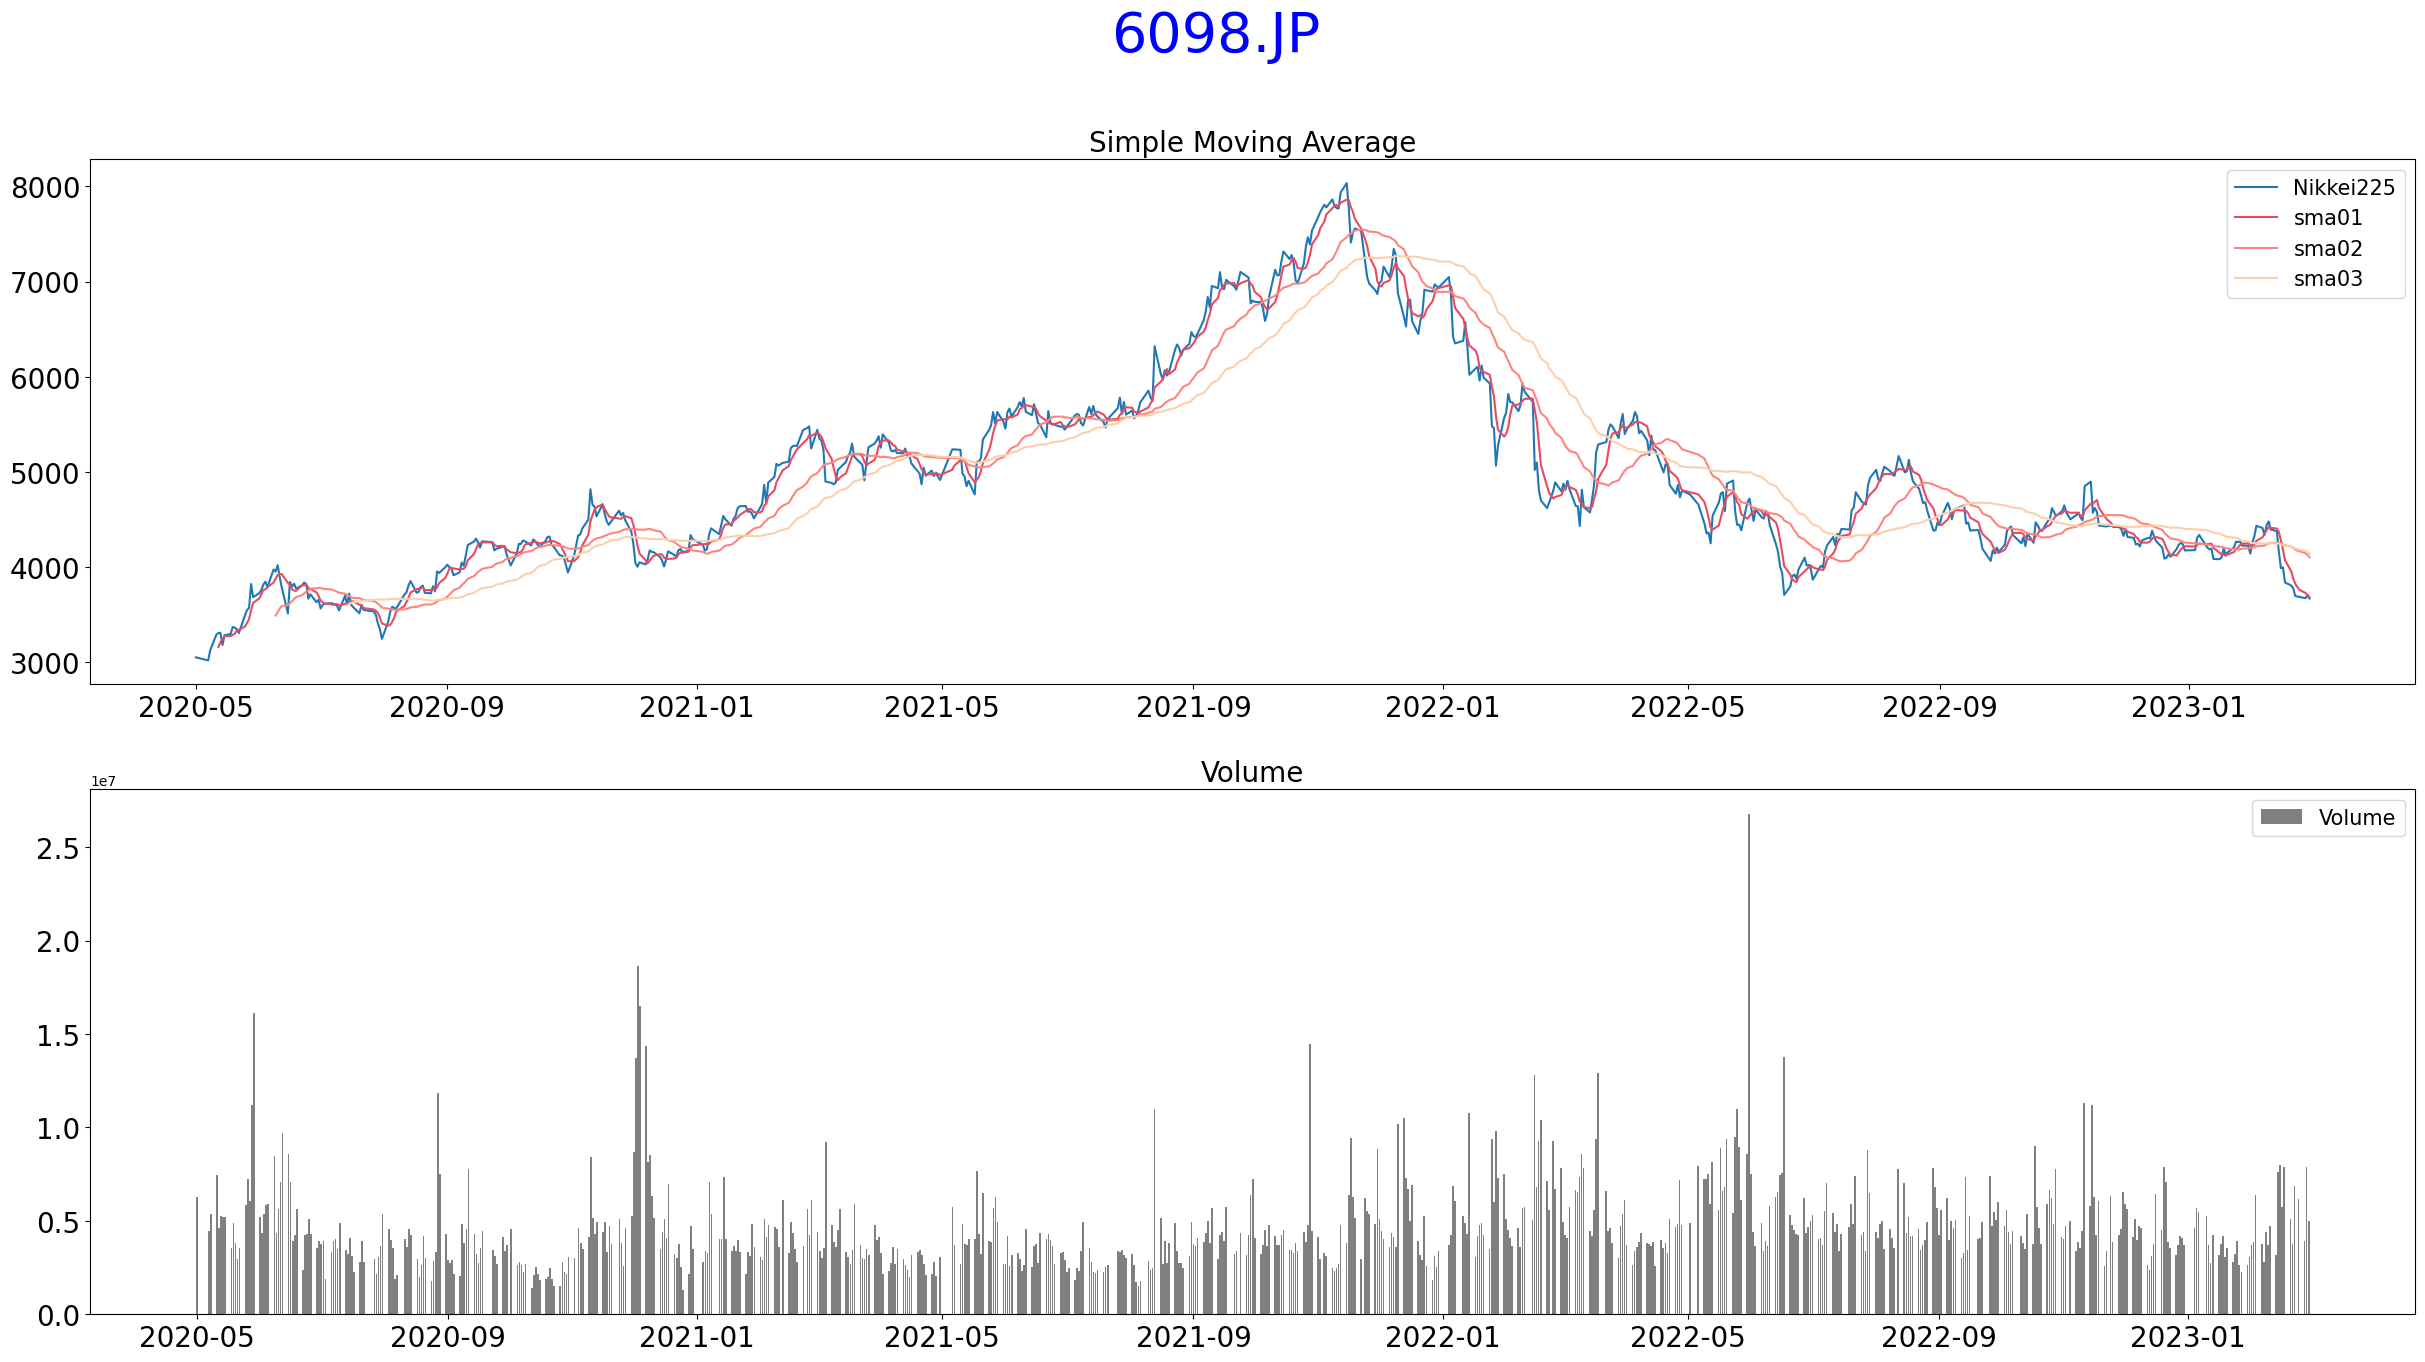

In [25]:
def company_stock(start, end, company_code):
    df = data.DataReader(company_code, "stooq")

    # 日付の小さい順に並び替える
    df = df.sort_index()
    # 取得したいデータを絞る
    df = df[(df.index>=start) & (df.index<=end)]

    date = df.index
    price = df["Close"]

    span01=5
    span02=25
    span03=50

    df["sma01"] = price.rolling(window=span01).mean()
    df["sma02"] = price.rolling(window=span02).mean()
    df["sma03"] = price.rolling(window=span03).mean()

    fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(30, 15))
    ax1.plot(date, price, label="Nikkei225")
    # それぞれのSMAの描画
    ax1.plot(date, df["sma01"], label="sma01", color="#e84a5f")
    ax1.plot(date, df["sma02"], label="sma02", color="#ff847c")
    ax1.plot(date, df["sma03"], label="sma03", color="#feceab")
    ax1.set_title("Simple Moving Average", fontsize=20)
    ax1.tick_params(axis="both", which="major", labelsize=20)
    ax1.legend(fontsize=15)

    ax2.bar(date, df["Volume"], label="Volume", color="gray")
    # tickのサイズを変更する
    ax2.tick_params(axis="both", which="major", labelsize=20)
    ax2.set_title("Volume", fontsize=20)
    ax2.legend(fontsize=15)

    # 全体のタイトルの指定
    fig.suptitle(company_code, fontsize=40, color="blue")

start = "2020-05-01"
end = "2023-03-01"
company_code = "6098.JP"
company_stock(start, end, company_code)

### ファーストリテイリンググループ

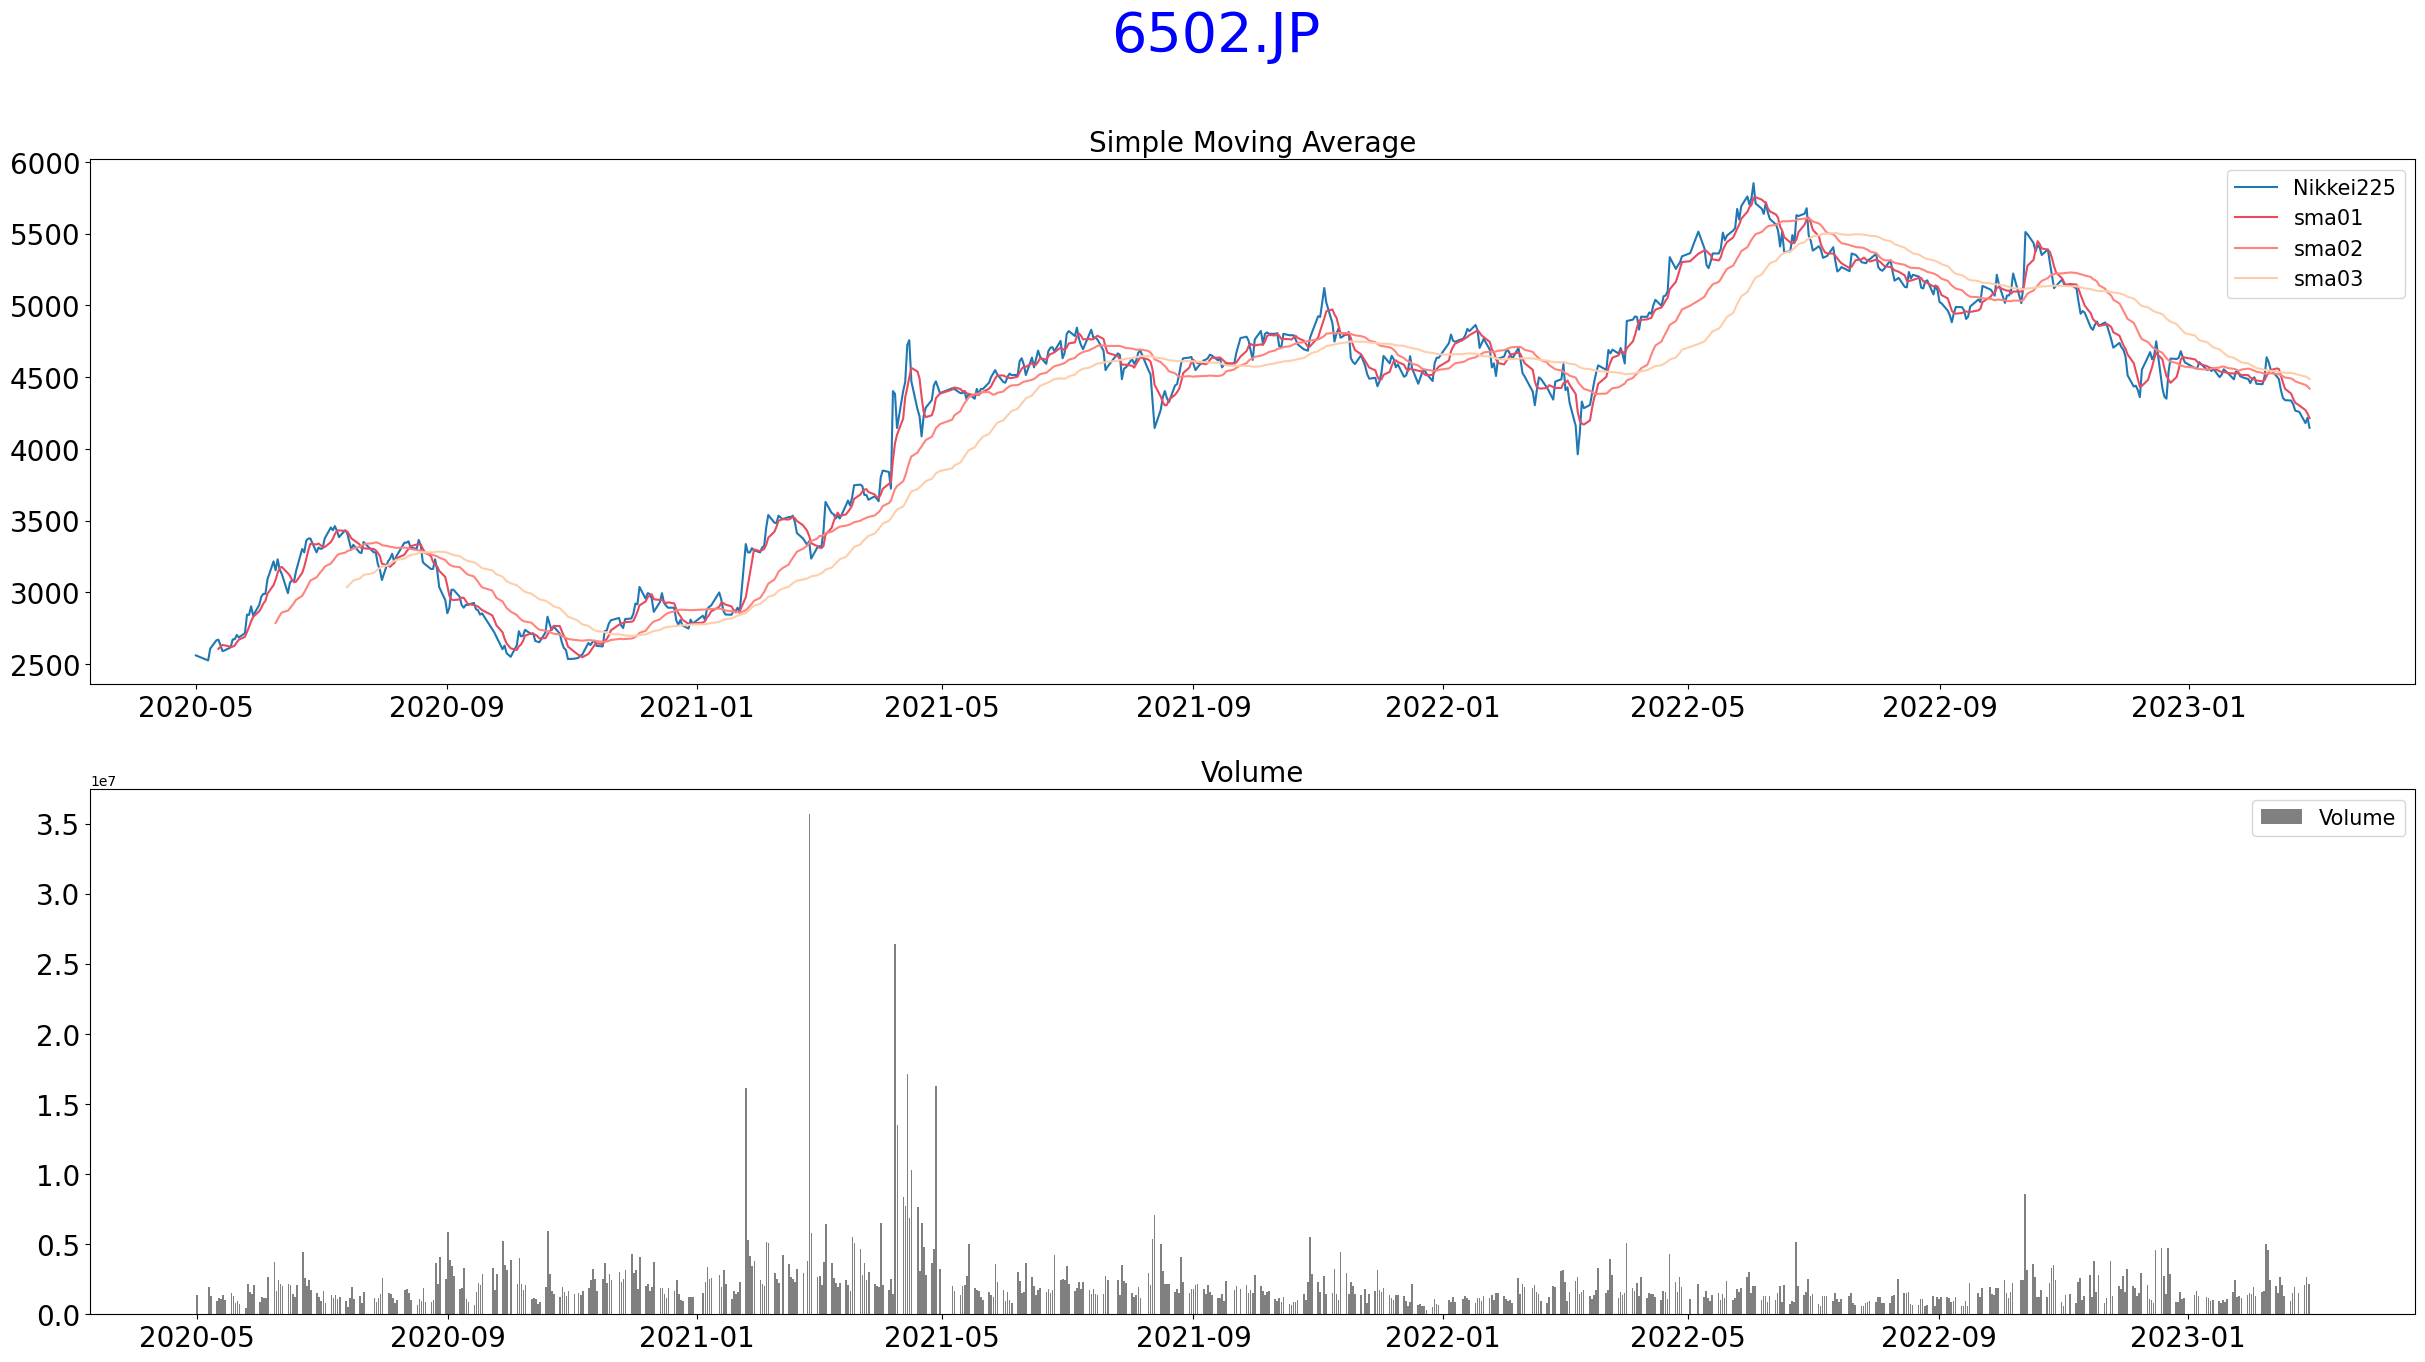

In [26]:
start = "2020-05-01"
end = "2023-03-01"
company_code = "6502.JP"
company_stock(start, end, company_code)

### トヨタ

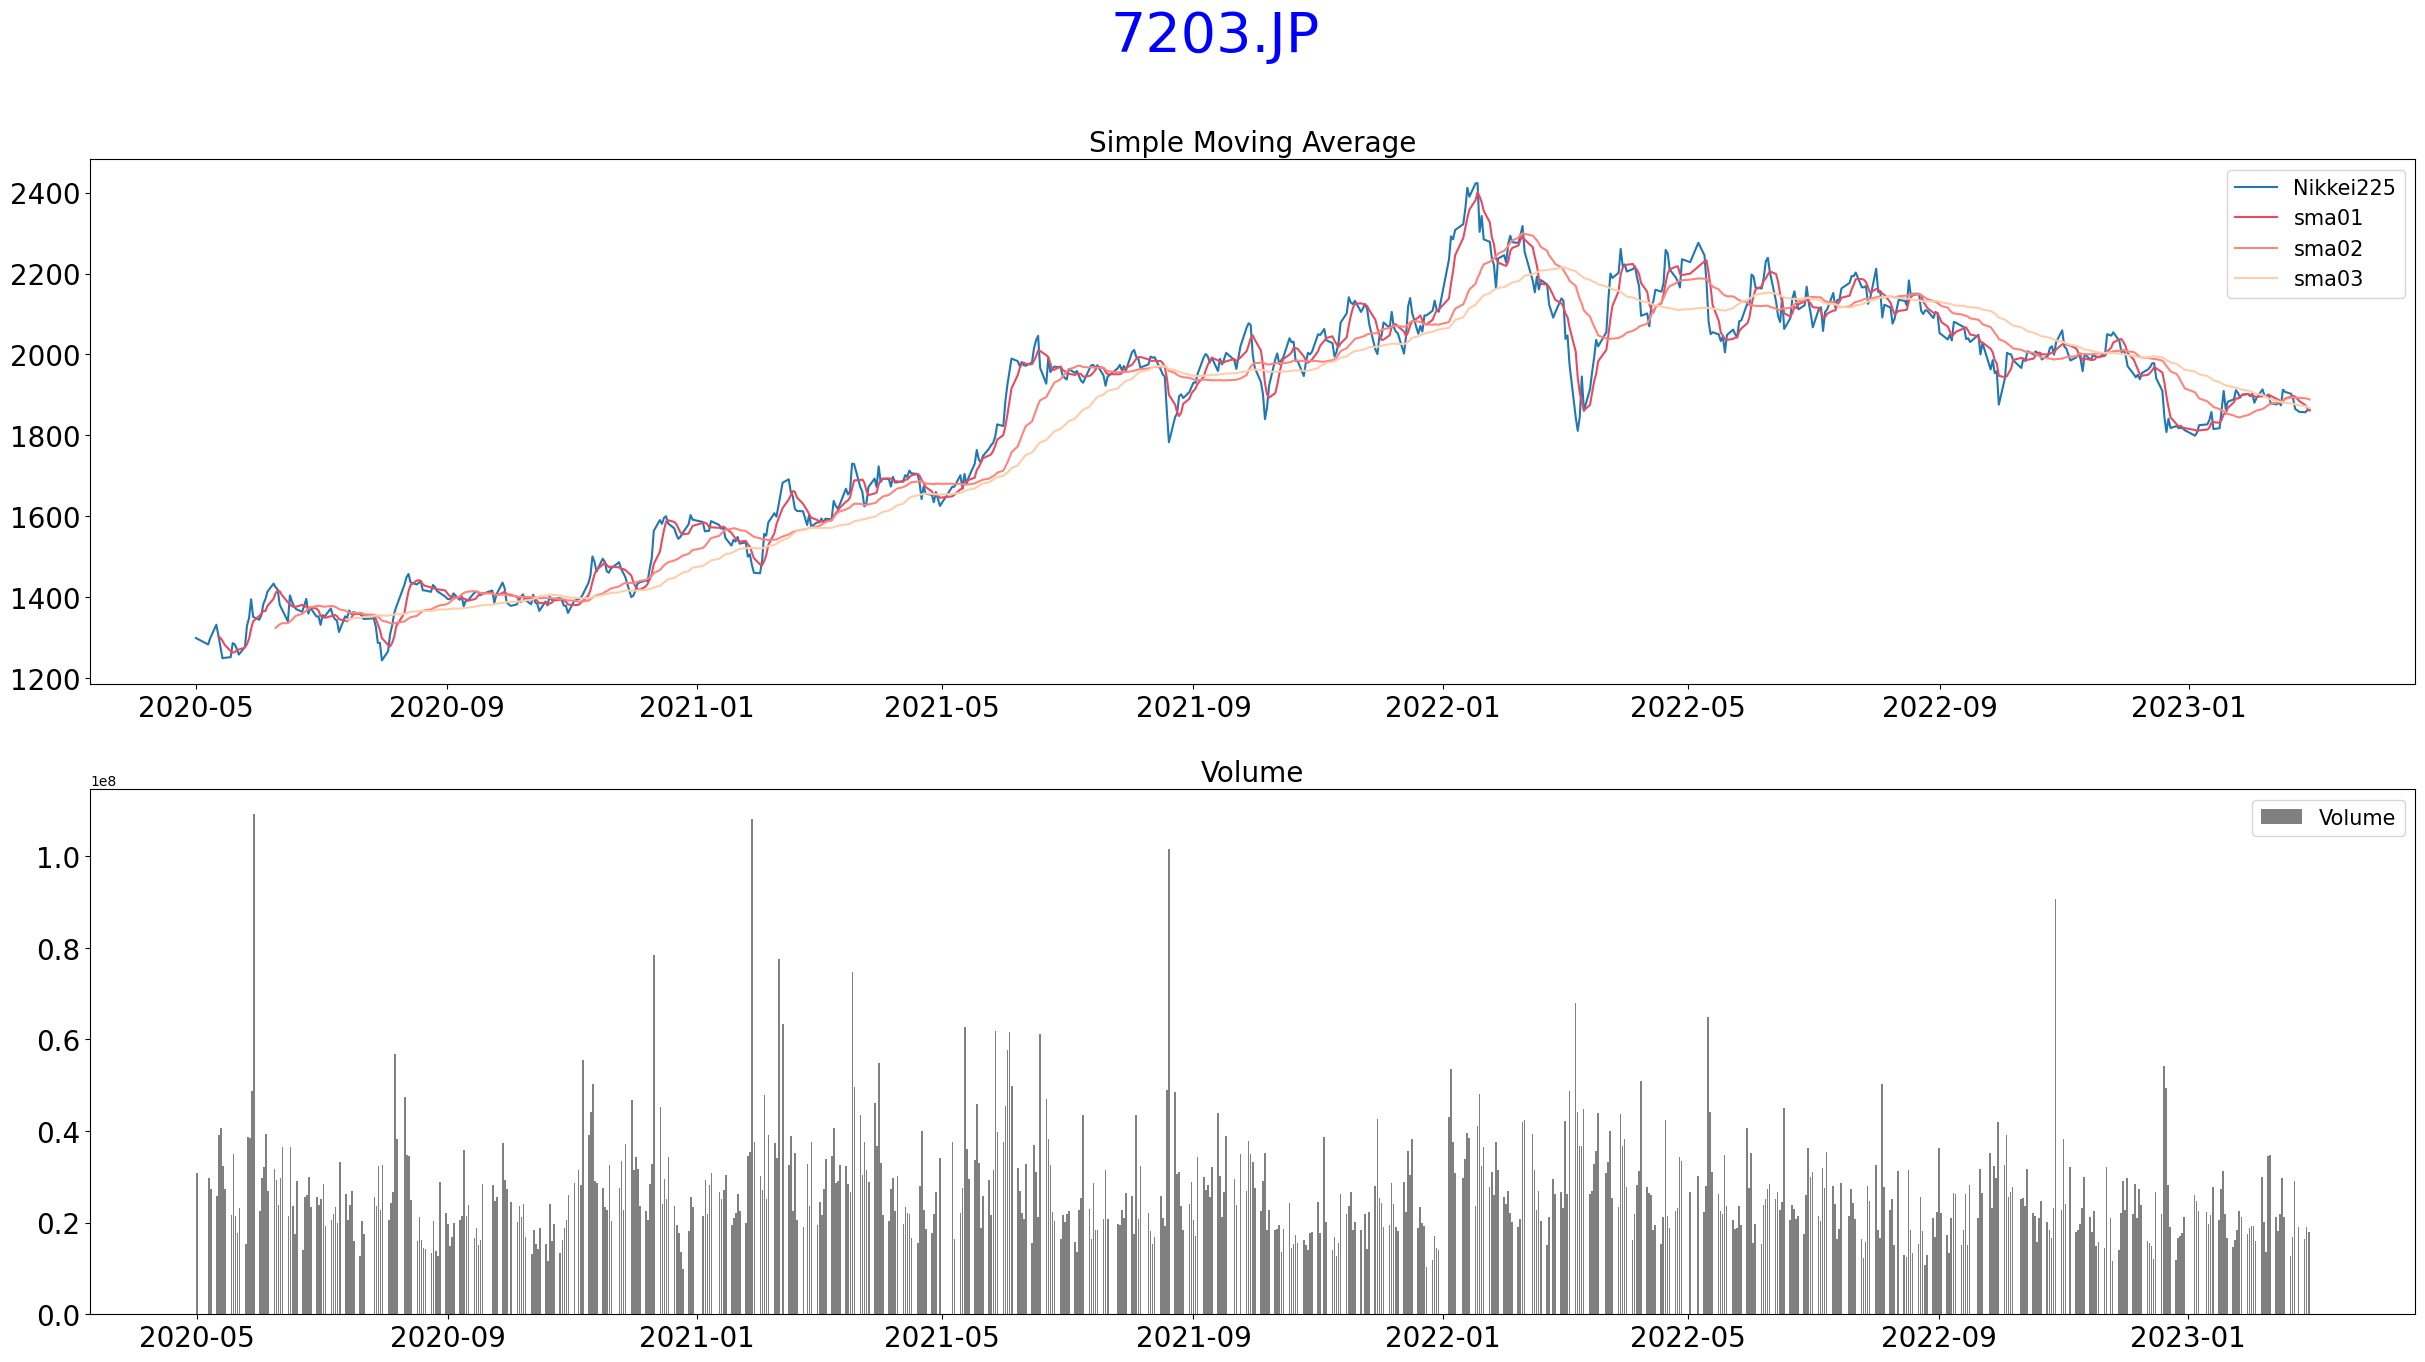

In [27]:
start = "2020-05-01"
end = "2023-03-01"
company_code = "7203.JP"
company_stock(start, end, company_code)